# Taller evaluable sobre la extracción, transformación y visualización de datos usando IPython

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia 

# Instrucciones

En la carpeta 'Taller' del repositorio 'ETVL-IPython' se encuentran los archivos 'Precio_Bolsa_Nacional_($kwh)_'*'.xls' en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada resuelva los siguientes puntos usando el lenguaje de programación Python. 

# Preguntas

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).  Imprima el encabezamiento de la tabla usando `head()`. 

In [86]:
import pandas
import numpy
l = []
for n in range(1995, 2018):
    nombrearchivo = 'Precio_Bolsa_Nacional_($kwh)_' + str(n)
    if n < 2000:
        skip=3
    else:
        skip=2
    if n>= 2016:
        nombrearchivo += '.xls'
    else:
        nombrearchivo += '.xlsx'
    
    excel=pandas.read_excel(nombrearchivo,skiprows=skip,parse_cols=24)
    l.append(excel)

datos = pandas.concat(l)
z = pandas.melt(datos,                            # DataFrame
                id_vars = ['Fecha'], # columnas que no se apilan
                var_name = 'Hora',       # nombre de la columna que contiene las columnas apiladas 
                value_name = 'Valores')       # nombre de la columna que contiene los valores
#df = pandas.DataFrame(numpy.asarray(excel[x]).T.tolist(),
#                      columns=['B','P','F','I','FP','BP','2','M','3','1','I','L'])
#print(excel.T.head())
print(len(z))

#10956

191088


**2.--** Compute e imprima el número de registros con datos faltantes.

In [58]:
len(z[z['Valores'].isnull()])

238

**3.--** Compute e imprima el número de registros duplicados.

In [ ]:
len(z[z.duplicated()])

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [87]:
z=z.dropna()
z=z.drop_duplicates()
len(z)


189091

**5.--** Compute y grafique el precio primedio diario.

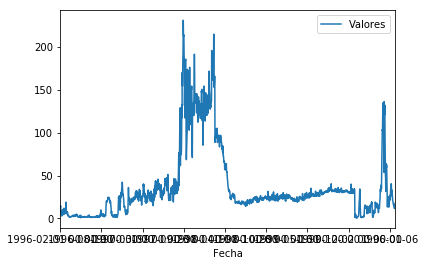

In [85]:
%matplotlib inline
promedio=z.groupby('Fecha').mean().plot()


#print(promedio.head())

#promedio.plot(x='Fecha', y='Valores', style='o')


**6.--** Compute y grafique el precio máximo por mes.

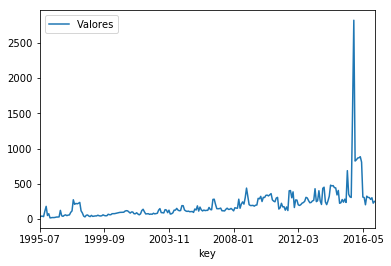

In [95]:
x = []
for i in range(len(z)):
    x.append(str(z.iat[i,0])[0:7])
z['key']=x
z.head()
%matplotlib inline
z.groupby('key').max().plot()


**7.--** Compute y grafique el precio mínimo mensual.

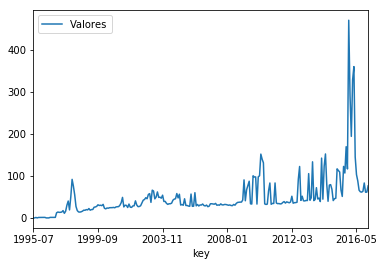

In [96]:
x = []
for i in range(len(z)):
    x.append(str(z.iat[i,0])[0:7])
z['key']=x
z.head()
%matplotlib inline
z.groupby('key').min().plot()


**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

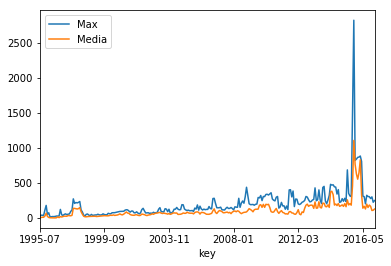

In [108]:
x = []
for i in range(len(z)):
    x.append(str(z.iat[i,0])[0:7])
z['key']=x
z.head()
%matplotlib inline
ax=z.groupby('key').max().plot()
z.groupby('key').mean().plot(ax=ax)
ax.legend(["Max", "Media"])

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

(array([   41.,    16.,    72.,   502.,  1245.,   811.,  1467.,  2573.,
         5432.,   523.]),
 array([  0. ,   2.3,   4.6,   6.9,   9.2,  11.5,  13.8,  16.1,  18.4,
         20.7,  23. ]),
 <a list of 10 Patch objects>)

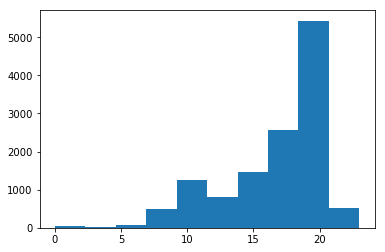

In [171]:
import matplotlib.pyplot as plt
import calendar
import datetime
x = []

#import time
## dd/mm/yyyy format
#print (time.strftime("%d/%m/%Y"))
#print(str(z.iat[1,0]))
#datetime.datetime.strptime(str(z.iat[1,0]), '%Y-%m-%d').date().weekday()

for i in range(len(z)):
    dia=calendar.day_name[datetime.datetime.strptime(str(z.iat[i,0])[0:10], '%Y-%m-%d').date().weekday()]    
    x.append(dia)
z['dia']=x
#z.head()

dias_semana=z[(z['dia']!='Saturday') & (z['dia']!='Sunday')]

hora_maxPrecio_dia=dias_semana.groupby(['Fecha'])['Valores'].max()
hora_maxPrecio_dia=hora_maxPrecio_dia.reset_index()
hora_maxPrecio_dia['Fecha']=hora_maxPrecio_dia['Fecha'].astype(str)
hora_maxPrecio_dia

    
graficar=pandas.merge(z,hora_maxPrecio_dia)
graficar

plt.hist(graficar['Hora'].astype(int))

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

(array([   24.,    12.,    15.,   156.,   361.,   287.,   109.,   491.,
         1248.,   217.]),
 array([  0. ,   2.3,   4.6,   6.9,   9.2,  11.5,  13.8,  16.1,  18.4,
         20.7,  23. ]),
 <a list of 10 Patch objects>)

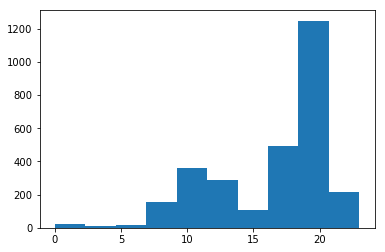

In [170]:
import matplotlib.pyplot as plt
import calendar
import datetime
x = []

#import time
## dd/mm/yyyy format
#print (time.strftime("%d/%m/%Y"))
#print(str(z.iat[1,0]))
#datetime.datetime.strptime(str(z.iat[1,0]), '%Y-%m-%d').date().weekday()

for i in range(len(z)):
    dia=calendar.day_name[datetime.datetime.strptime(str(z.iat[i,0])[0:10], '%Y-%m-%d').date().weekday()]    
    x.append(dia)
z['dia']=x
#z.head()

dias_semana=z[(z['dia']=='Saturday') ]

hora_maxPrecio_dia=dias_semana.groupby(['Fecha'])['Valores'].max()
hora_maxPrecio_dia=hora_maxPrecio_dia.reset_index()
hora_maxPrecio_dia['Fecha']=hora_maxPrecio_dia['Fecha'].astype(str)
hora_maxPrecio_dia

    
graficar=pandas.merge(z,hora_maxPrecio_dia)
graficar

plt.hist(graficar['Hora'].astype(int))


**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

(array([   65.,    32.,    23.,    68.,    99.,   120.,    82.,   399.,
         1435.,   333.]),
 array([  0. ,   2.3,   4.6,   6.9,   9.2,  11.5,  13.8,  16.1,  18.4,
         20.7,  23. ]),
 <a list of 10 Patch objects>)

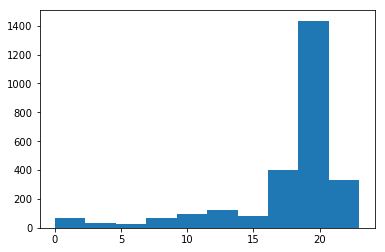

In [172]:
import matplotlib.pyplot as plt
import calendar
import datetime
x = []

#import time
## dd/mm/yyyy format
#print (time.strftime("%d/%m/%Y"))
#print(str(z.iat[1,0]))
#datetime.datetime.strptime(str(z.iat[1,0]), '%Y-%m-%d').date().weekday()

for i in range(len(z)):
    dia=calendar.day_name[datetime.datetime.strptime(str(z.iat[i,0])[0:10], '%Y-%m-%d').date().weekday()]    
    x.append(dia)
z['dia']=x
#z.head()

dias_semana=z[(z['dia']=='Sunday')]

hora_maxPrecio_dia=dias_semana.groupby(['Fecha'])['Valores'].max()
hora_maxPrecio_dia=hora_maxPrecio_dia.reset_index()
hora_maxPrecio_dia['Fecha']=hora_maxPrecio_dia['Fecha'].astype(str)
hora_maxPrecio_dia

    
graficar=pandas.merge(z,hora_maxPrecio_dia)
graficar

plt.hist(graficar['Hora'].astype(int))

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [202]:
import matplotlib.pyplot as plt
import calendar
import datetime
x = []

for i in range(len(z)):
    year=str(z.iat[i,0])[0:4]    
    x.append(year)
z['annio']=x

hora_maxPrecio_dia=z.groupby(['annio'])['Valores'].min()

hora_maxPrecio_dia=hora_maxPrecio_dia.reset_index()

#hora_maxPrecio_dia['Fecha']=hora_maxPrecio_dia['Fecha'].astype(str)
#hora_maxPrecio_dia


graficar=pandas.merge(z,hora_maxPrecio_dia)
print(graficar[['Fecha','Valores']])

#plt.hist(graficar['Fecha'].astype(int))

                   Fecha    Valores
0             1995-07-28   0.000000
1             1995-07-31   0.000000
2             1995-08-01   0.000000
3             1995-10-13   0.000000
4             1995-07-28   0.000000
5             1995-07-31   0.000000
6             1995-08-01   0.000000
7             1995-10-13   0.000000
8             1995-07-28   0.000000
9             1995-07-29   0.000000
10            1995-07-30   0.000000
11            1995-07-31   0.000000
12            1995-08-01   0.000000
13            1995-10-13   0.000000
14            1995-07-28   0.000000
15            1995-07-29   0.000000
16            1995-07-30   0.000000
17            1995-07-31   0.000000
18            1995-08-01   0.000000
19            1995-10-13   0.000000
20            1995-07-28   0.000000
21            1995-07-30   0.000000
22            1995-07-31   0.000000
23            1995-08-01   0.000000
24            1995-07-29   0.000000
25            1995-07-30   0.000000
26            1995-07-31   0

**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

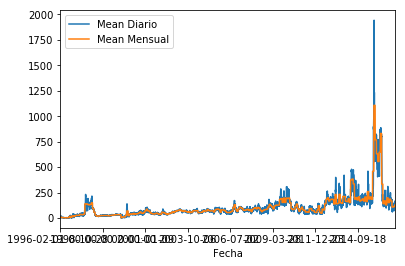

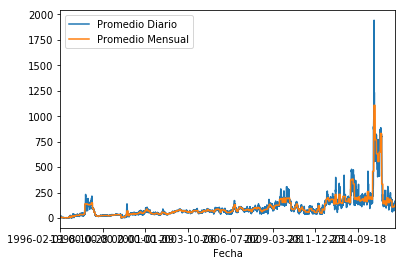

In [225]:
%matplotlib inline

x = []
for i in range(len(z)):
    x.append(str(z.iat[i,0])[0:7])
z['key']=x
z.head()

meses_mean=z.groupby(['key'])['Valores'].mean()
meses_mean=meses_mean.reset_index()
z_meses_mean=pandas.merge(z,meses_mean, on='key', how='left')

#Grafico 1
mes_valor=z_meses_mean[['Fecha','Valores_y']]
dia_valor=z_meses_mean[['Fecha','Valores_x']]

ax=dia_valor.groupby('Fecha').mean().plot()
mes_valor.groupby('Fecha').mean().plot(ax=ax)
ax.legend(["Mean Diario", "Mean Mensual"])

#Grafico 2
dia_mes_valor=z_meses_mean[['Fecha','Valores_x','Valores_y']]

ax1=dia_mes_valor.groupby('Fecha').mean().plot()
ax1.legend(["Promedio Diario", "Promedio Mensual"])


---